###  import package

In [81]:
# import library
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import gensim
import tensorflow
import keras
%matplotlib inline

# my functions
import helpers.data_mining_helpers as dmh


print("gensim: " + gensim.__version__)
print("tensorflow: " + tensorflow.__version__)
print("keras: " + keras.__version__)

gensim: 4.2.0
tensorflow: 2.10.0
keras: 2.10.0


### Load data

In [82]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [83]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [84]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [85]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [86]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


## Exercise 1

Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)

In [87]:
#Noted that : 1. Generate word frequncy(先斷字 取token 變數字) 2.畫圖時間(bar)

In [88]:
### answer here

##train_df

# 1 tokenize_text
train_df['unigrams'] = train_df['text'].apply(lambda x: dmh.tokenize_text(x))

# 2. Create a counter for the frequency table
from collections import Counter
cnt = Counter()

for text in str(train_df['unigrams']).split():
    cnt[text] += 1

# 3.See most common 30 words
cnt.most_common(30)

word_freq = pd.DataFrame(cnt.most_common(30),columns=['words', 'count'])
word_freq.head()

,words,count
0,"[@,",6
1,...,4
2,"@,",2
3,"'s,",2
4,"a,",2


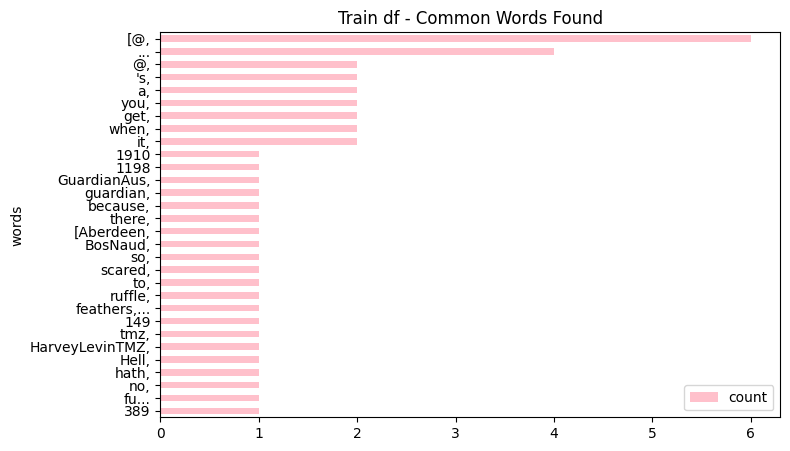

In [89]:
# 4. Plot horizontal bar graph

fig, ax = plt.subplots(figsize=(8, 5))
word_freq.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="pink")
ax.set_title("Train df - Common Words Found")
plt.show()

In [90]:
#test_df
#1. tokenize_text
test_df['unigrams'] = test_df['text'].apply(lambda x: dmh.tokenize_text(x))
test_df[0:1]["unigrams"]

# 2. Create a counter for the frequency table
from collections import Counter
cnt_test_df = Counter()

for text_test_df in str(test_df["unigrams"]).split():
    cnt_test_df[text] += 1

# 3.See most common 30 words
cnt_test_df.most_common(30)

word_freq_test_df = pd.DataFrame(cnt.most_common(30),columns=['words', 'count'])
word_freq_test_df.head()

,words,count
0,"[@,",6
1,...,4
2,"@,",2
3,"'s,",2
4,"a,",2


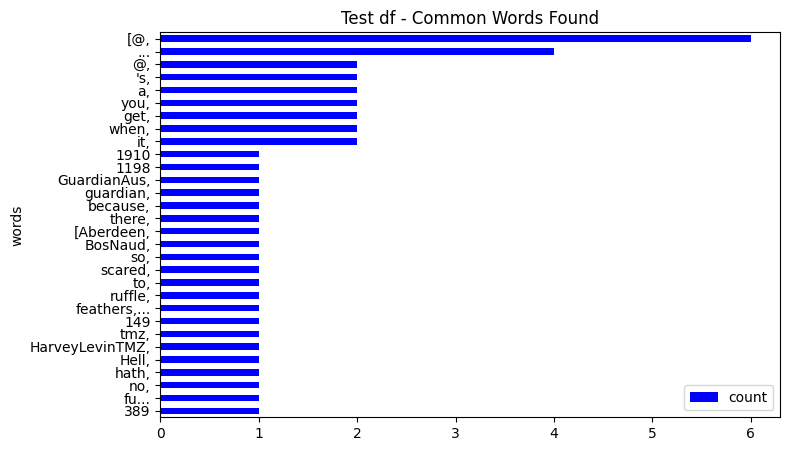

In [91]:
fig, ax = plt.subplots(figsize=(8, 5))
word_freq.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="blue")
ax.set_title("Test df - Common Words Found")
plt.show()

### 1.2 save to pickle file

In [92]:
## save to pickle file
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")

In [93]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

###  1.3 group to find distribution

df.groupby(['column name'])

In [94]:
###1.3
# group to find distribution #df.groupby
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

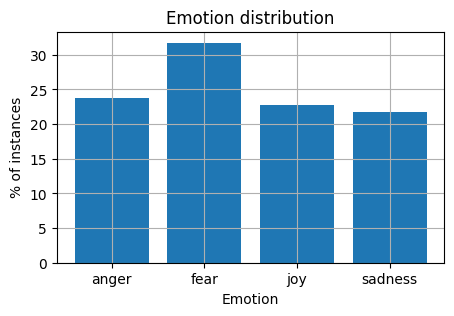

In [95]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique() #unique 自動幫我們從df[emotion']中區分不一樣的名稱 
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text'] #group ['emotion'] and count it -> series
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

## 2.Feature engineering
###### BOW_vectorizer 
###### train_data_BOW_features 
###### test_data_BOW_features 
###### feature_names

In [96]:
from sklearn.feature_extraction.text import CountVectorizer

In [97]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [98]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

# check the result
train_data_BOW_features #type:scipy.sparse._csr.csr_matrix

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [99]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [100]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [101]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out() #np.ndarray
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

In [102]:
"😂" in feature_names

False

In [103]:
def build_tokenizer(self):
    """Return a function that splits a string into a sequence of tokens"""
    if self.tokenizer is not None:
        return self.tokenizer
    token_pattern = re.compile(self.token_pattern)
    return token_pattern.findall

In [104]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)

In [105]:
train_data_BOW_features_500.toarray()

array([[0, 2, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [4, 2, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [106]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheerfully', 'cheering', 'cheery',
       'come', 'comes', 'could', 'country'], dtype=object)

In [107]:
"😂" in feature_names_500

True

## Exercise2 
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [108]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

#instantiate CountVectorizer() 
cv=CountVectorizer() 

# this steps generates word counts for the words in your docs 
word_count_vector=cv.fit_transform(train_df['text'])

# vocabulary
#feature_names_500[100:110]

word_count_vector.shape

(3613, 10115)

In [109]:
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True) 
tfidf_transformer.fit(word_count_vector)

TfidfTransformer()

In [110]:
# print idf values 
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["idf_weights"]) 
# sort ascending 
df_idf.sort_values(by=['idf_weights'])

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,idf_weights
the,2.039519
to,2.239842
and,2.474766
is,2.631540
of,2.657329
...,...
indicates,8.499423
indiatoday,8.499423
indiansummer,8.499423
innocence,8.499423


In [111]:
# count matrix 
count_vector=cv.transform(train_df['text']) 
# tf-idf scores 
tf_idf_vector=tfidf_transformer.transform(count_vector)

In [112]:
feature_names = cv.get_feature_names() 
#get tfidf vector for first document 
first_document_vector=tf_idf_vector[0] 
#print the scores 
df = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"]) 
df.sort_values(by=["tfidf"],ascending=False)
df[100:110]

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,tfidf
2k17,0.0
2much,0.0
2nd,0.0
30,0.0
300,0.0
301,0.0
30am,0.0
30pm,0.0
30s,0.0
31,0.0


# 3.Model
### 3.1 Decision Trees

###### sklearn.tree

In [113]:
from sklearn.tree import DecisionTreeClassifier

# 1. for a 'classificaiton' problem, you need to provide both 'training & testing data'
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [114]:
## 2. build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## 3. training!
DT_model = DT_model.fit(X_train, y_train)

## 3. predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['anger', 'fear', 'sadness', 'anger', 'anger', 'fear', 'anger',
       'fear', 'anger', 'sadness'], dtype=object)

## 4. Results Evaluation
##### sklearn.metric
###### acc_train
###### acc_test

In [115]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.99
testing accuracy: 0.68


In [116]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



In [117]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[57 18  6  3]
 [16 76  9  9]
 [ 6  9 56  8]
 [ 7 13  7 47]]


In [118]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

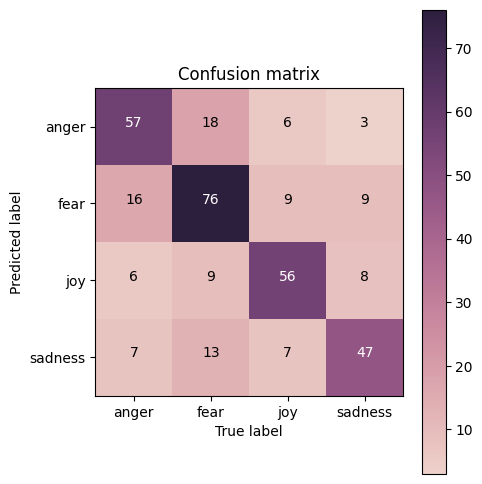

In [119]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

## Exercise 3
Can you interpret the results above? What do they mean?

In [120]:
## Answer here
# Observe the above table,
# the diagonal of the square table (57,76,56,47) means the predicted value is same as the actual value.
# the top right part of the table(18,6,3,9,9,8) means Type I error, which means the predicted value is positive but it's false.
# the lower left part of the table (16,6,9,7,13,7) means Type II error, which means the predicted value is negative but it's positive.

## Exercise 4 (Take home)
Build a model using a Naive Bayes model and train it. What are the testing results?

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [134]:
# 1. for a 'classificaiton' problem, you need to provide both 'training & testing data'
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

In [142]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import MultinomialNB

#Create a MultinomialNB
model = MultinomialNB()

# Train the model using the training sets
model.fit(X_train,y_train)

#Predict Output
y_pred = model.predict(X_test)

predicted

array(['anger', 'anger', 'sadness', 'sadness', 'anger', 'fear', 'anger',
       'fear', 'sadness', 'sadness', 'sadness', 'joy', 'joy', 'fear',
       'anger', 'sadness', 'joy', 'fear', 'sadness', 'fear', 'anger',
       'fear', 'sadness', 'anger', 'sadness', 'sadness', 'fear', 'anger',
       'sadness', 'fear', 'sadness', 'fear', 'joy', 'fear', 'sadness',
       'anger', 'sadness', 'fear', 'joy', 'anger', 'fear', 'fear', 'fear',
       'sadness', 'joy', 'anger', 'sadness', 'joy', 'anger', 'anger',
       'fear', 'joy', 'fear', 'fear', 'anger', 'anger', 'joy', 'anger',
       'anger', 'joy', 'joy', 'anger', 'joy', 'anger', 'joy', 'anger',
       'joy', 'sadness', 'anger', 'sadness', 'anger', 'anger', 'sadness',
       'anger', 'anger', 'joy', 'fear', 'sadness', 'fear', 'fear',
       'anger', 'anger', 'joy', 'joy', 'fear', 'anger', 'fear', 'sadness',
       'fear', 'sadness', 'anger', 'sadness', 'fear', 'fear', 'joy',
       'fear', 'fear', 'sadness', 'anger', 'anger', 'joy', 'fear',
  

In [143]:
##Evaluating Model

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6974063400576369


## Exercise 5 (Take home):
How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [ ]:
In this section, the accuracy of Naive Bayes model is a little higher 
than the Decision Tree model. (0.69>0.68)

# Naive Bayes model 
A major advantage to Naive Bayes classifiers is that they are not prone to overfitting.
Naive Bayes classifiers are easily implemented and highly scalable, with a linear computational complexity with respect to the number of data entries.

# Decision Tree model 
They are fast, efficient, and work with all kinds of data, both numerical and categorical, discrete or continuous. 
However, unless properly pruned, decision trees tend to overfit the training data by eventually including unimportant or nonsense features. 
Another disadvantage is that the algorithm separates the samples linearly. 

## 6. Deep Learning

### 6.1 Prepare data (X, y)

In [122]:
import keras

# standardize name (X, y)
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


### 6.2 Deal with categorical label (y)
###### label_encoder

In [123]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 1198     fear
389     anger
149     anger
1910     fear
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


C:\Users\User\AppData\Local\Temp\ipykernel_7608\508161062.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print('y_train[0:4]:\n', y_train[0:4])


### 6.3 Build model

In [124]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


In [125]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense (Dense)               (None, 64)                32064     
                                                                 
 re_lu (ReLU)                (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_1 (ReLU)              (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
 softmax (Softmax)           (None, 4)                 0     

### 6.4 Train

In [126]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 64), dtype=float32), dense_shape=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


113/113 [==============================] - 1s 3ms/step - loss: 1.3294 - accuracy: 0.3678 - val_loss: 1.2681 - val_accuracy: 0.4236
Epoch 2/25
113/113 [==============================] - 0s 2ms/step - loss: 1.0103 - accuracy: 0.6299 - val_loss: 0.9389 - val_accuracy: 0.6427
Epoch 3/25
113/113 [==============================] - 0s 2ms/step - loss: 0.6074 - accuracy: 0.7896 - val_loss: 0.8133 - val_accuracy: 0.6916
Epoch 4/25
113/113 [==============================] - 0s 2ms/step - loss: 0.4267 - accuracy: 0.8420 - val_loss: 0.8132 - val_accuracy: 0.6859
Epoch 5/25
113/113 [==============================] - 0s 2ms/step - loss: 0.3362 - accuracy: 0.8802 - val_loss: 0.8238 - val_accuracy: 0.7003
Epoch 6/25
113/113 [==============================] - 0s 2ms/step - loss: 0.2753 - accuracy: 0.9092 - val_loss: 0.8683 - val_accuracy: 0.6888
Epoch 7/25
113/113 [==============================] - 0s 2ms/step - loss: 0.2300 - accuracy: 0.9231 - val_loss: 0.9328 - val_accuracy: 0.6744
Epoch 8/25
113/11

### 6.5 Predict on testing data

In [127]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 [==============================] - 0s 2ms/step


array([[8.3031595e-01, 2.8829973e-02, 1.3591342e-01, 4.9407152e-03],
       [8.7633097e-01, 6.7428132e-03, 4.1387440e-03, 1.1278752e-01],
       [5.6356230e-06, 1.8149602e-03, 1.1060031e-06, 9.9817824e-01],
       [3.3557654e-04, 4.2758227e-05, 4.9796869e-05, 9.9957186e-01],
       [9.9463683e-01, 1.1950424e-04, 5.2373600e-03, 6.3013931e-06]],
      dtype=float32)

In [128]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['anger', 'anger', 'sadness', 'sadness', 'anger'], dtype=object)

In [129]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.66


In [130]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.367838,1.329444,0.423631,1.268056
1,1,0.629947,1.010278,0.642651,0.938926
2,2,0.789648,0.607431,0.691643,0.813302
3,3,0.841960,0.426675,0.685879,0.813237
4,4,0.880155,0.336239,0.700288,0.823754
5,5,0.909217,0.275294,0.688761,0.868251
6,6,0.923056,0.229990,0.674352,0.932830
7,7,0.933850,0.194499,0.668588,0.950451
8,8,0.948519,0.162111,0.682997,1.061427
9,9,0.954055,0.142215,0.662824,1.084149


### Exercise 6 (Take home):

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class? 

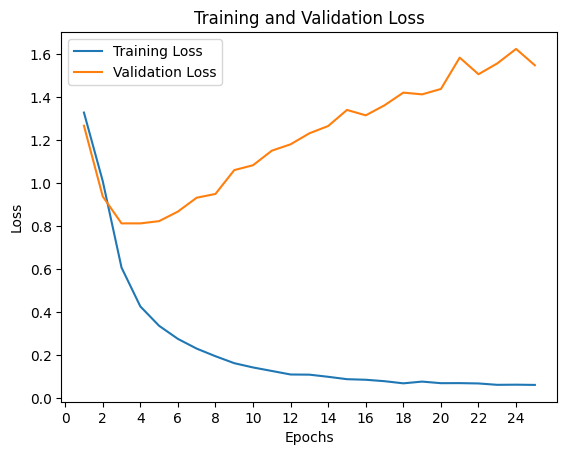

In [149]:
from matplotlib.pylab import plt
from numpy import arange

# Generate a sequence of integers to represent the epoch numbers
epochs = range(1, 26)

# Plot and label the training and validation loss values
plt.plot(epochs, training_log['loss'], label='Training Loss')
plt.plot(epochs, training_log['val_loss'], label='Validation Loss')

# Add in a title and axes labels
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Set the tick locations
plt.xticks(arange(0, 25, 2))
 
# Display the plot
plt.legend(loc='best')
plt.show()

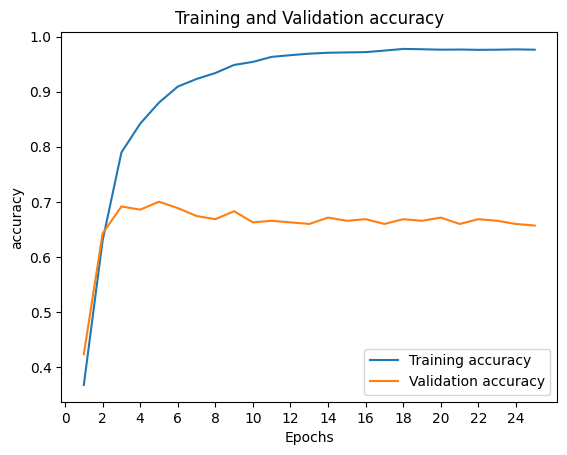

In [150]:
# Generate a sequence of integers to represent the epoch numbers
epochs = range(1, 26)

# Plot and label the training and validation loss values
plt.plot(epochs, training_log['accuracy'], label='Training accuracy')
plt.plot(epochs, training_log['val_accuracy'], label='Validation accuracy')

# Add in a title and axes labels
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')

# Set the tick locations
plt.xticks(arange(0, 25, 2))
 
# Display the plot
plt.legend(loc='best')
plt.show()

## 7. Word2Vector

### 7.1 Prepare training corpus

In [131]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
1198,20341,@GuardianAus @guardian because there is a real...,"[@, GuardianAus, @, guardian, because, there, ..."
389,10389,"@BosNaud so scared to ruffle feathers, he reso...","[@, BosNaud, so, scared, to, ruffle, feathers,..."
149,10149,@tmz @HarveyLevinTMZ Hell hath no fury like ...,"[@, tmz, @, HarveyLevinTMZ, Hell, hath, no, fu..."
1910,21053,"Aberdeen st Johnstone, let's see who can punt ...","[Aberdeen, st, Johnstone, ,, let, 's, see, who..."
1608,20751,@ManUnitedWriter He has had a dreadful first h...,"[@, ManUnitedWriter, He, has, had, a, dreadful..."


In [132]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['@', 'GuardianAus', '@', 'guardian', 'because', 'there', 'is', 'a', 'realistic', 'probability', 'that', 'a', 'clown', 'might', 'be', 'their', 'next', 'president', '.', '#', 'clown', '#', 'uspol']),
       list(['@', 'BosNaud', 'so', 'scared', 'to', 'ruffle', 'feathers', ',', 'he', 'resorted', 'to', 'writing', 'in', 'cryptic', 'code', '.', '#', 'UncleCamsCabin']),
       list(['@', 'tmz', '@', 'HarveyLevinTMZ', 'Hell', 'hath', 'no', 'fury', 'like', 'a', 'women', 'scorned', '.', 'It', "'s", 'the', 'affair', '.', 'Not', 'the', 'parenting'])],
      dtype=object)

### 7.2 Training our model

In [151]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

### 7.3 Generating word vector (embeddings) 

In [152]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.48502263,  0.410226  , -0.17938805,  0.14504577, -0.03308841,
       -1.0271828 ,  0.2617849 ,  1.5104448 , -0.7499453 , -0.28726187,
       -0.3968511 , -0.56676877, -0.27129638,  0.25664806, -0.33485106,
       -0.5566103 ,  0.32627025, -0.5646622 ,  0.312625  , -1.3799605 ,
        0.63878906,  0.42167488,  0.21549702, -0.15110633,  0.0927091 ,
       -0.04358315, -0.51954466,  0.16555677, -0.5437994 ,  0.2627984 ,
        0.3431508 ,  0.01575374,  0.28699267, -0.8316683 , -0.24518616,
        0.83155596,  0.01054876, -0.21817152, -0.49134317, -0.30279812,
        0.17313176, -0.13534506, -0.22819127,  0.2178044 ,  0.6066029 ,
       -0.19447663, -0.43583182,  0.03296792,  0.52856183,  0.3206699 ,
        0.15098044, -0.5376441 ,  0.10677988,  0.00203348, -0.5012322 ,
       -0.2886196 ,  0.11851664, -0.25559798,  0.02389438,  0.20600411,
        0.38418046,  0.08591992,  0.53761435,  0.14228259, -0.77718145,
        0.7886855 ,  0.50879705,  0.77760285, -1.6024592 ,  0.32

In [153]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('Makes', 0.9308149814605713),
 ('missiles.\\n\\n', 0.9242360591888428),
 ('Be', 0.9194923639297485),
 ('cats', 0.9183508157730103),
 ('birthday', 0.9137498736381531),
 ('help', 0.913618803024292),
 ("'you", 0.902790367603302),
 ('Kik', 0.9003793597221375),
 ('O', 0.9002938866615295),
 ('plz', 0.8973158001899719)]

### 7.4 Using a pre-trained w2v model

In [157]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

In [160]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

[==================================================] 100.0% 104.8/104.8MB downloaded
load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158351421356201),
 ('thanks', 0.915008544921875),
 ('merry', 0.9053249359130859),
 ('bless', 0.902732253074646),
 ('wish', 0.9013164043426514)]

## 7.5 king + woman - man = ?

In [161]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

## Exercise7

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). How can we utilize these "word" vectors to represent the sentence data and train our model?

In [167]:
# Answer here
#We may just leave the important words
#,then we use the "word" vectors to find out the relationship

# 8. Clustering: k-means

In [162]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [163]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 0
word: fear 	 cluster: 0
word: angry 	 cluster: 0
word: car 	 cluster: 1
word: teacher 	 cluster: 1
word: computer 	 cluster: 1


In [164]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1])

In [165]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0])

# 9 High-dimension Visualization: t-SNE

## 9.1 Prepare visualizing target

In [166]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


## 9.2 Plot using t-SNE (2-dimension)

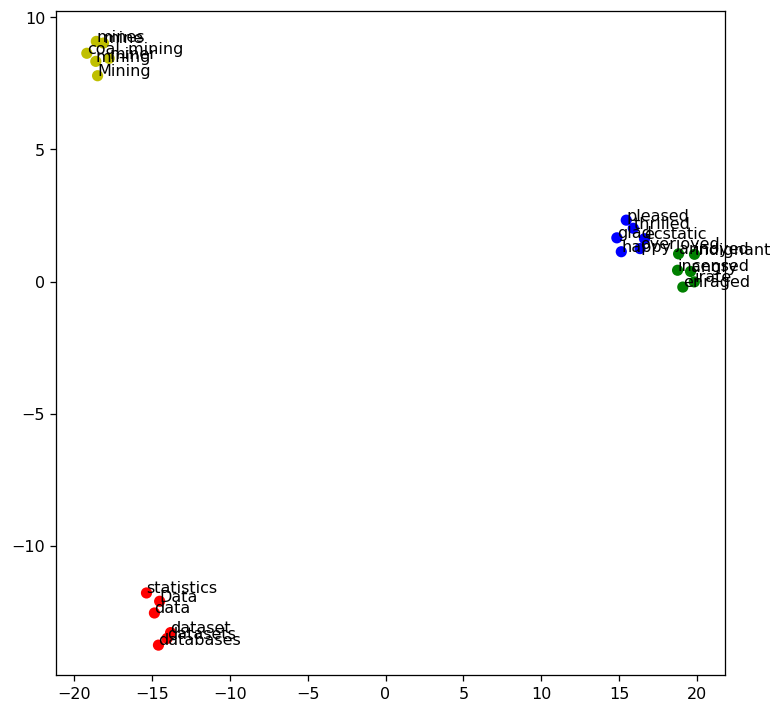

In [168]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

## Exercise 8 (Take home): 

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).


In [173]:
# Answer here

word_list = ['happy', 'angry', 'sad', 'fear']

topn = 15
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]  

print('angry_words: ', angry_words)
print('happy_words: ', happy_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

target_words = angry_words + happy_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirsc

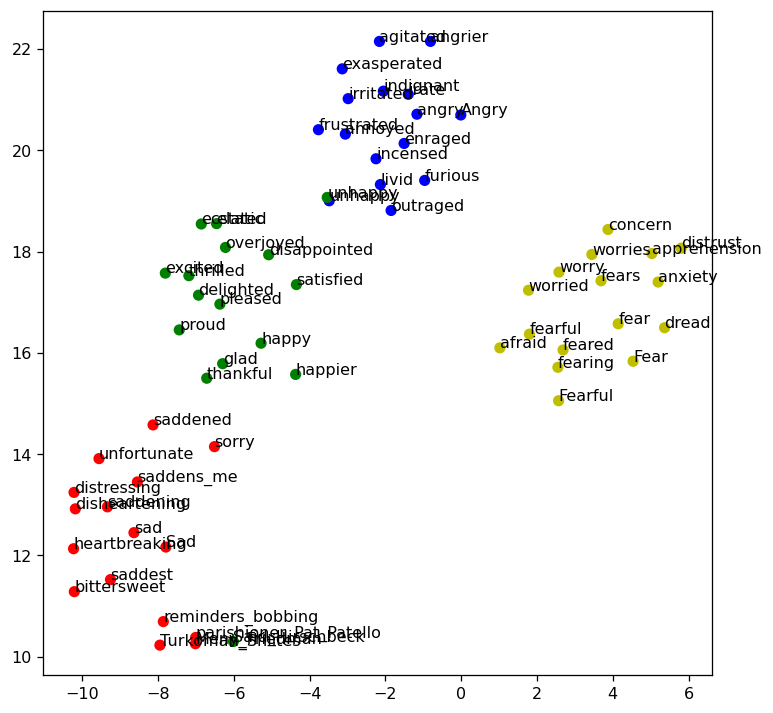

In [174]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()